In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import sklearn.discriminant_analysis as skl_da
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as skl_ms
import matplotlib.pyplot as plt

In [29]:
url = 'https://raw.githubusercontent.com/Ari-vu/SML/main/Given_data/train.csv'
df = pd.read_csv(url)

In [30]:
X = df.drop(columns=['Lead'])
y = df.Lead

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creati

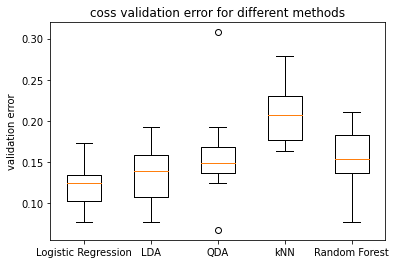

In [31]:
k_fold = 10
random_state = 43

# define models with the optimal hyperparameters
models = []
models.append(LogisticRegression(solver='liblinear', random_state=random_state))
models.append(skl_da.LinearDiscriminantAnalysis())
models.append(skl_da.QuadraticDiscriminantAnalysis())
models.append(KNeighborsClassifier(n_neighbors=6))
models.append(RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=2,
                                     n_estimators=1200, random_state=random_state))

missclassification = np.zeros((k_fold, len(models)))
cv = skl_ms.KFold(n_splits=k_fold, random_state=random_state, shuffle=True)

for i, (train_index, val_index) in enumerate(cv.split(X)):
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]
  norm = MinMaxScaler().fit(X_train)
  X_train_norm, X_val_norm = norm.transform(X_train), norm.transform(X_val)

  for m in range(np.shape(models)[0]):
    model = models[m]
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    missclassification[i, m] = np.mean(prediction != y_val)

plt.boxplot(missclassification)
plt.title('coss validation error for different methods')
plt.xticks(np.arange(5)+1, ('Logistic Regression', 'LDA', 'QDA', 'kNN', 'Random Forest'))
plt.ylabel('validation error')
plt.show()